# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
print("The number of rows is: ", df.shape[0])
print("The number of columns is: ", df.shape[1])

The number of rows is:  1898
The number of columns is:  9


#### Observations: The dataset contains 1,898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Information about the data: columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There is one column with data type float:
- "cost_of_the_order"

There are 4 columns with data type integer:
- "order_id"
- "customer_id"
- "food_preparation_time"
- "delivery_time"

There are 4 columns with data type string:
- "restaurant_name"
- "cuisine_type"
- "day_of_the_week"
- "rating" 


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Check how many missing values are in the dataset.
missing = df.isnull().sum()
print(missing)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: There are no missing values in the data. In the event that there is, they can be replaced with 0, min, median, or max depending on data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Statistical description of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

Food preparation time:
    minimun: 20 minutes
    average: 27.37 minutes
    maximum: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Find how many ratings are 'Not given'
not_rated = df[df['rating'] == 'Not given'].value_counts().sum()
print(not_rated)

736


#### Observations: There are 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

#### Restaurant Name

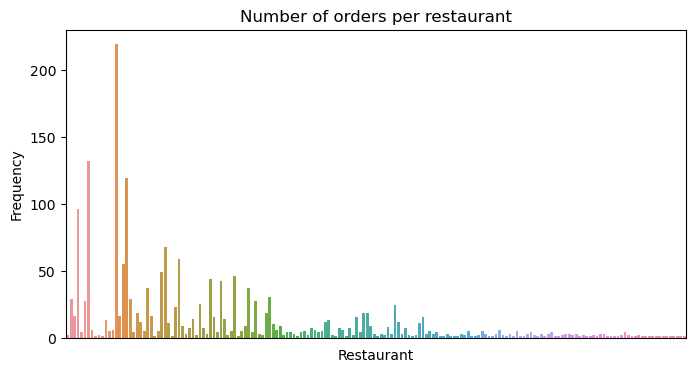

In [10]:
# Number of orders per restaurant
plt.figure(figsize=(8,4))
sns.countplot(x=df['restaurant_name'])

plt.title('Number of orders per restaurant')
plt.xlabel('Restaurant')
plt.xticks([])
#plt.xticks(rotation=30)
plt.ylabel('Frequency')
plt.show()

In [11]:
print("The number of orders per restaurant ranges from a few to over 200.")
orders = pd.DataFrame(df['restaurant_name'].value_counts())
print(orders)
print(orders[orders['restaurant_name']==1].value_counts())

The number of orders per restaurant ranges from a few to over 200.
                           restaurant_name
Shake Shack                            219
The Meatball Shop                      132
Blue Ribbon Sushi                      119
Blue Ribbon Fried Chicken               96
Parm                                    68
...                                    ...
Sushi Choshi                             1
Dos Caminos Soho                         1
La Follia                                1
Philippe Chow                            1
'wichcraft                               1

[178 rows x 1 columns]
restaurant_name
1                  50
dtype: int64


#### Cuisine Type

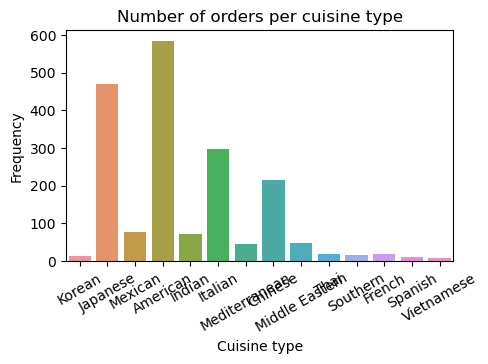

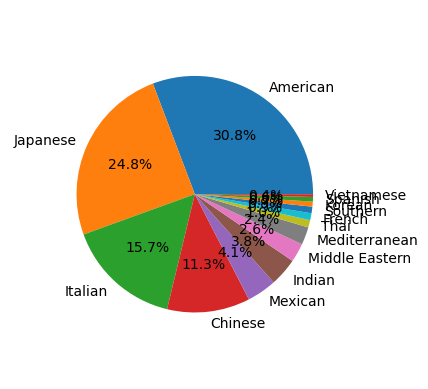

In [17]:
# Number of orders per cuisine type

# Count plot
plt.figure(figsize=(5,3))
sns.countplot(x=df['cuisine_type'])
plt.title('Number of orders per cuisine type')
plt.xlabel('Cuisine type')
plt.xticks(rotation=30)
plt.ylabel('Frequency')
plt.show()

# Pie plot
labels = list(df['cuisine_type'].value_counts().index)
plt.pie(df['cuisine_type'].value_counts(), autopct = '%.1f%%', radius = 0.8, 
        labels = labels)
plt.show()


#### Observation: American cuisine is most popular with 30.8% and Japanese second most popular with 24.8%

#### Cost of the Order

<Figure size 200x100 with 0 Axes>

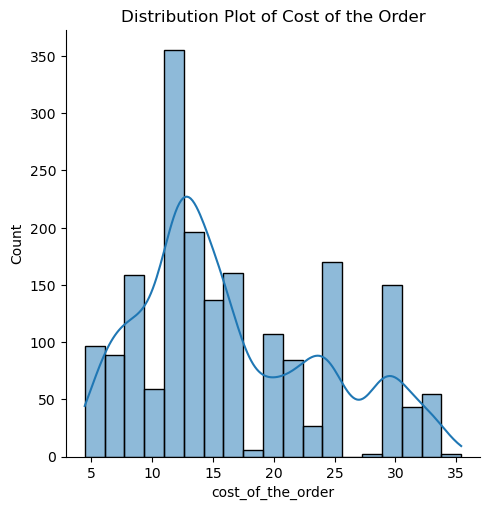

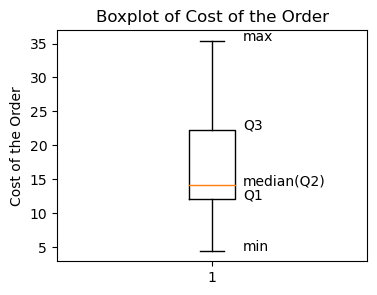

In [28]:
# Distribution plot
plt.figure(figsize=(2,1))
sns.displot(data=df, x='cost_of_the_order', kde=True)
plt.title('Distribution Plot of Cost of the Order')
plt.show()

# Box plot
plt.figure(figsize=(4,3))
plt.boxplot(df['cost_of_the_order'])
plt.text(x=1.1,y=df['cost_of_the_order'].min(), s='min')
plt.text(x=1.1,y=df['cost_of_the_order'].quantile(0.25), s='Q1')
plt.text(x=1.1,y=df['cost_of_the_order'].median(), s='median(Q2)')
plt.text(x=1.1,y=df['cost_of_the_order'].quantile(0.75), s='Q3')
plt.text(x=1.1,y=df['cost_of_the_order'].max(), s='max')

plt.title('Boxplot of Cost of the Order')
plt.ylabel('Cost of the Order')
plt.show()

In [34]:
print("The minimum cost of the order is", df['cost_of_the_order'].min())
print("The median cost of the order is", df['cost_of_the_order'].median())
print("The maximum cost of the order is", df['cost_of_the_order'].max())

The minimum cost of the order is 4.47
The median cost of the order is 14.14
The maximum cost of the order is 35.41


#### Day of the Week

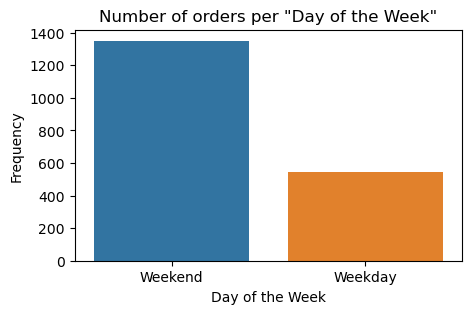

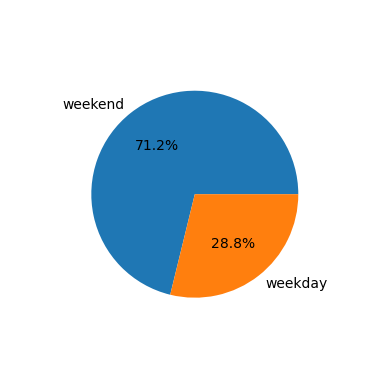

In [29]:
# Number of orders per Day of the Week

# Count plot
plt.figure(figsize=(5,3))
sns.countplot(x=df['day_of_the_week'])
plt.title('Number of orders per "Day of the Week"')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

# Box plot
labels = ['weekend', 'weekday']
plt.pie(df['day_of_the_week'].value_counts(), autopct = '%.1f%%', radius = 0.7, 
        labels = labels)
plt.show()

In [73]:
# Count the number of days in "day of the week".
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

#### Rating

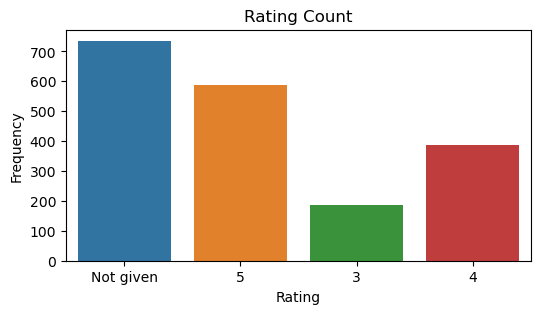

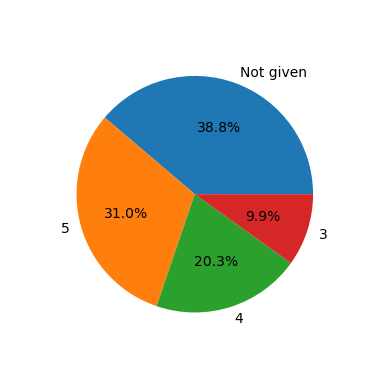

In [31]:
# Rating count 

# Count plot
plt.figure(figsize=(6,3))
sns.countplot(x=df['rating'])
plt.title('Rating Count')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Pie plot
labels = ['Not given', '5', '4', '3']
plt.pie(df['rating'].value_counts(), autopct = '%.1f%%', radius = 0.8, 
        labels = labels)
plt.show()

In [38]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

There are 736 "Not Given". Among the ratings, 5 is the most frequent rating.

#### Food preparation time

<Figure size 400x200 with 0 Axes>

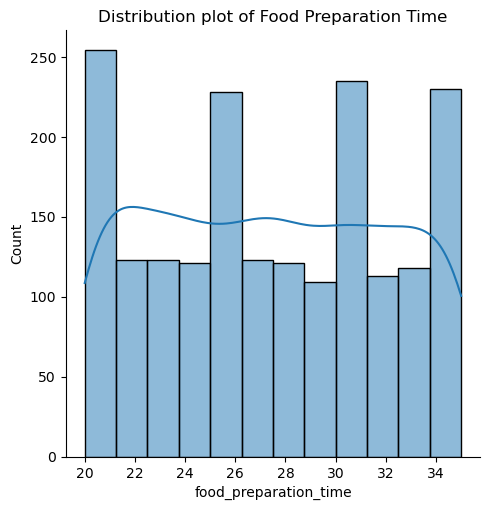

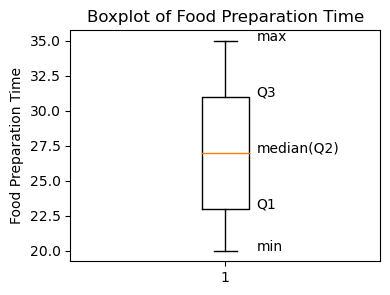

In [34]:
# Distribution plot
plt.figure(figsize=(4,2))
sns.displot(data=df, x='food_preparation_time', kde=True)
plt.title('Distribution plot of Food Preparation Time')
plt.show()

# Boxplot
plt.figure(figsize=(4,3))
plt.boxplot(df['food_preparation_time'])
plt.text(x=1.1,y=df['food_preparation_time'].min(), s='min')
plt.text(x=1.1,y=df['food_preparation_time'].quantile(0.25), s='Q1')
plt.text(x=1.1,y=df['food_preparation_time'].median(), s='median(Q2)')
plt.text(x=1.1,y=df['food_preparation_time'].quantile(0.75), s='Q3')
plt.text(x=1.1,y=df['food_preparation_time'].max(), s='max')
plt.title('Boxplot of Food Preparation Time')
plt.ylabel('Food Preparation Time')
plt.show()

In [76]:
print("The minimum of food preparation time is", df['food_preparation_time'].min())
print("The median of food preparation time is", df['food_preparation_time'].median())
print("The maximum of food preparation time is", df['food_preparation_time'].max())

The minimum of food preparation time is 20
The median of food preparation time is 27.0
The maximum of food preparation time is 35


#### Delivery Time 

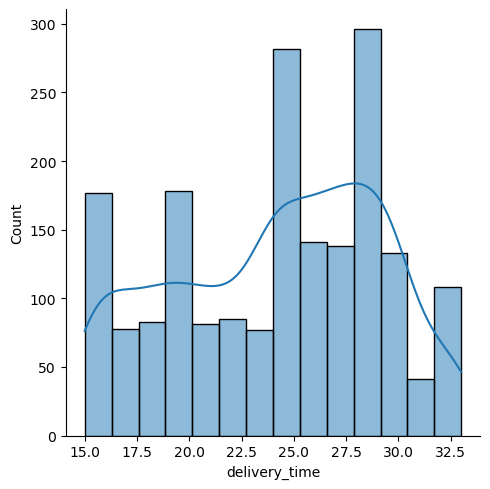

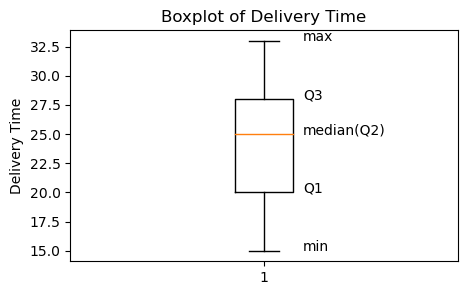

In [35]:
# Distribution plot
sns.displot(data=df, x='delivery_time', kde=True)
plt.show()

# Box plot
plt.figure(figsize=(5,3))
plt.boxplot(df['delivery_time'])
plt.text(x=1.1,y=df['delivery_time'].min(), s='min')
plt.text(x=1.1,y=df['delivery_time'].quantile(0.25), s='Q1')
plt.text(x=1.1,y=df['delivery_time'].median(), s='median(Q2)')
plt.text(x=1.1,y=df['delivery_time'].quantile(0.75), s='Q3')
plt.text(x=1.1,y=df['delivery_time'].max(), s='max')

plt.title('Boxplot of Delivery Time')
plt.ylabel('Delivery Time')
plt.show()

In [78]:
print("The minimum of delivery time is", df['delivery_time'].min())
print("The median of delivery time is", df['delivery_time'].median())
print("The maximum of delivery time is", df['delivery_time'].max())

The minimum of delivery time is 15
The median of delivery time is 25.0
The maximum of delivery time is 33


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [80]:
# The first 5 restaurants with the highest counts.
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: Shake Shake, The Meatball Shop, Blue Riboon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [81]:
# The first element of orders during the weekend ordered by cuisine type 
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations: During the weekend, American is the most popular cuisine with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [82]:
# Create a dataset of orders greater than 20.
df_greater_than_20 = df[df['cost_of_the_order']>20] 
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
percentage

29.24130663856691

#### Observations: Percentage of orders above 20 dollars: 29.24 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [83]:
# Preparation of food is necessary to deliver food.
df['food_preparation_time'].mean() + df['delivery_time'].mean()

51.53371970495259

#### Observations: The mean order delivery time is the sum of mean food preparation time and delivery time: 51 minutes and 30 seconds.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [84]:
# The top three of the customer_id frequency series
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The customer id numbers of the top 3 most frequent customers are 52832, 47440, and 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


<Figure size 800x800 with 0 Axes>

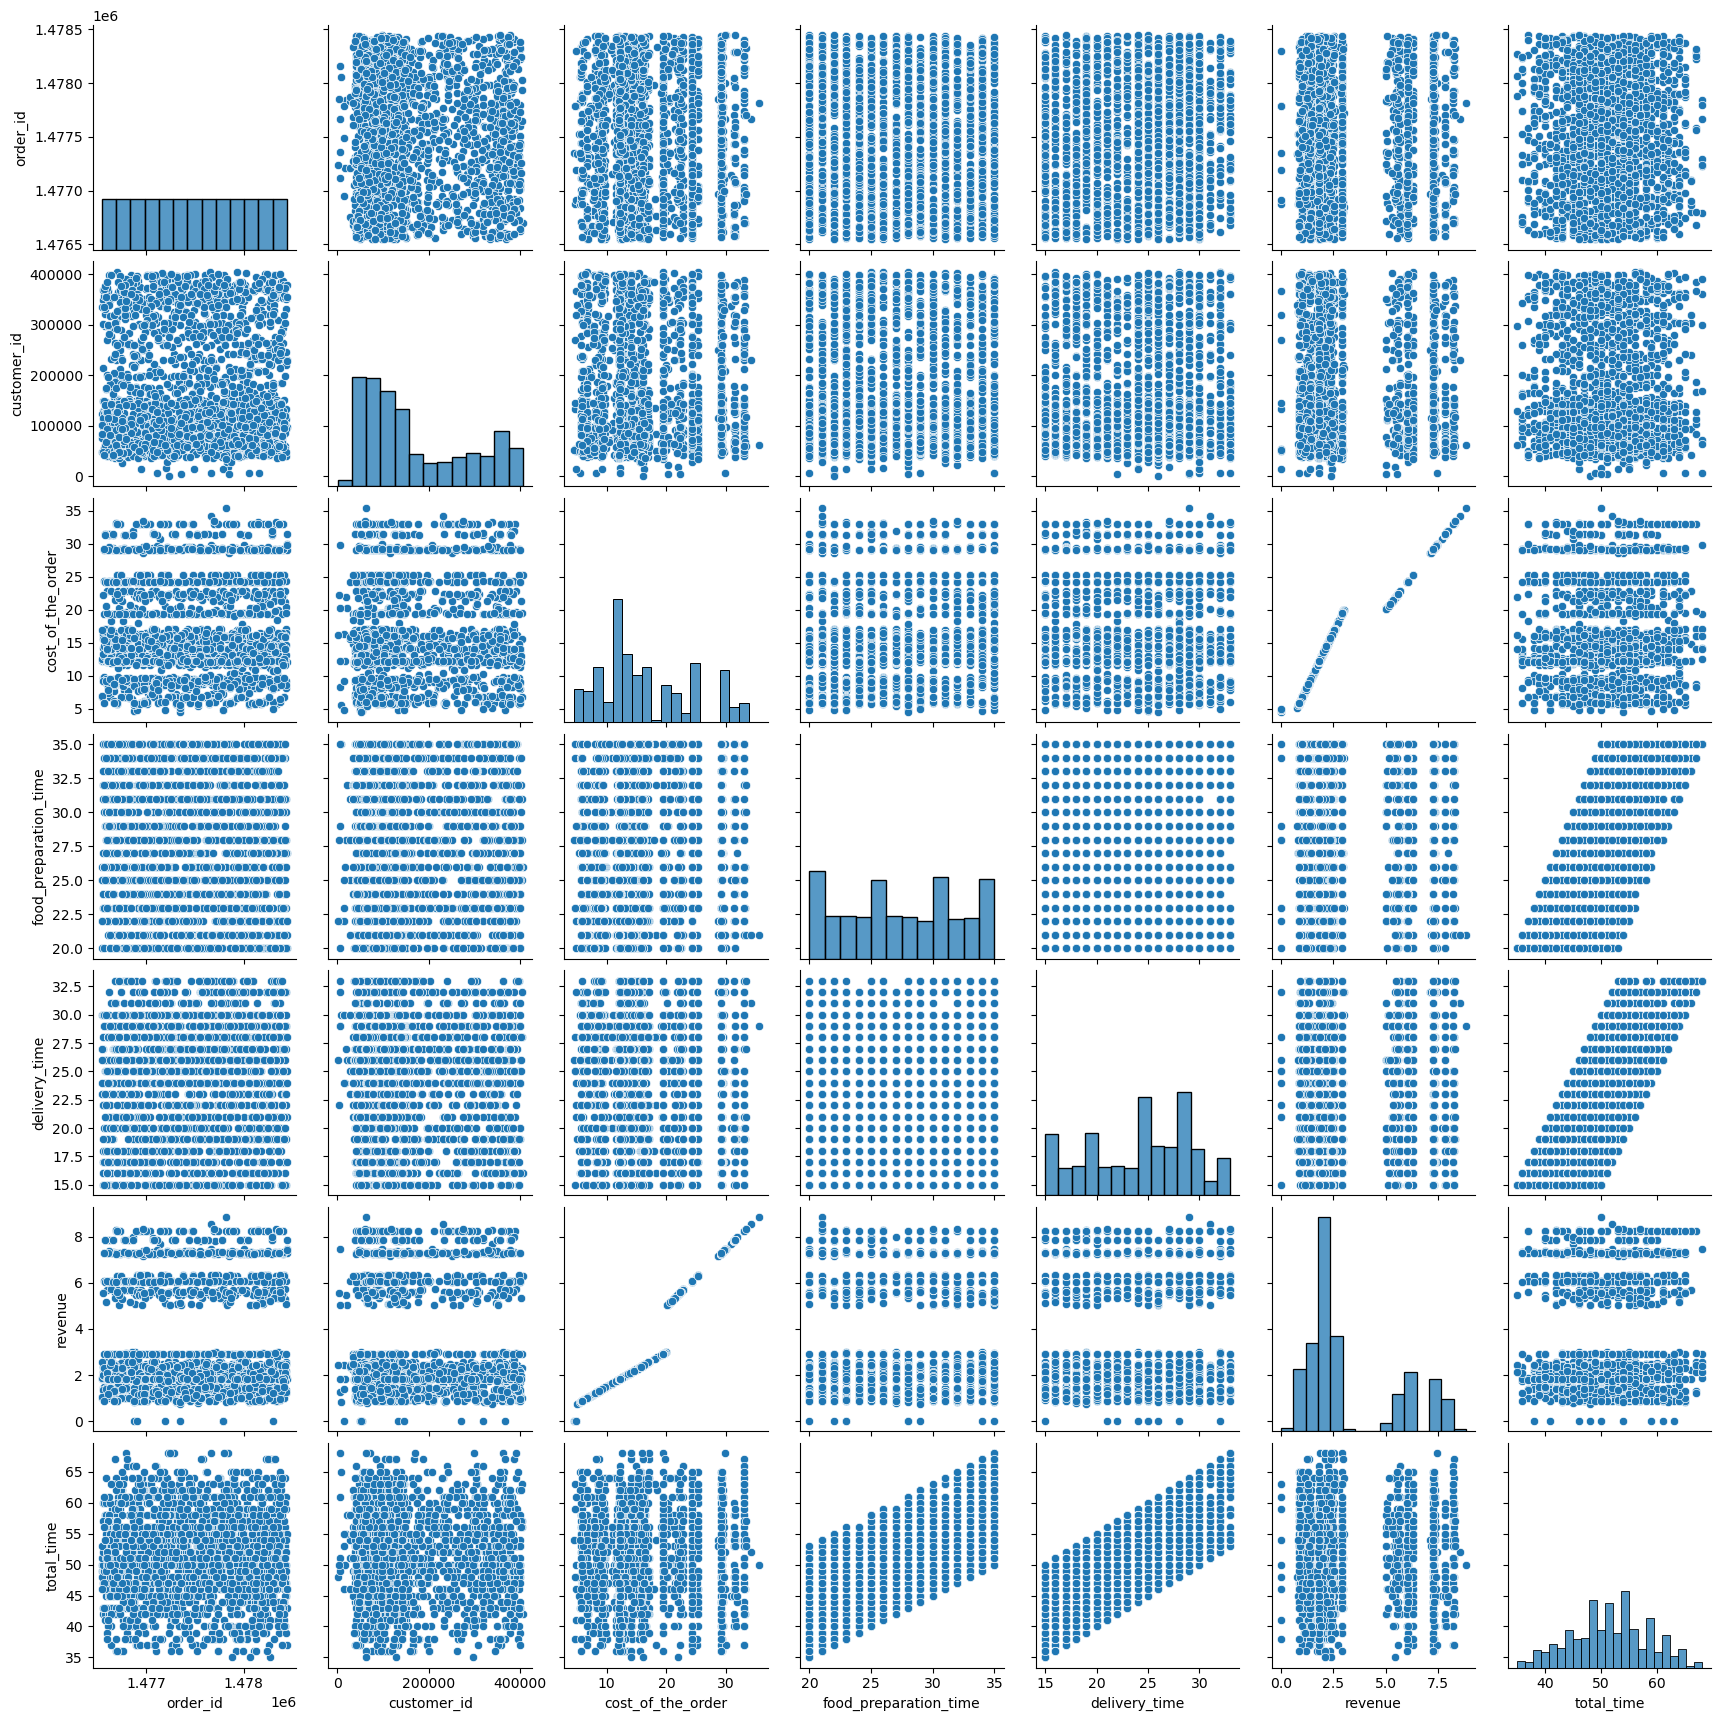

In [85]:
# Pair plot to see the correlations.
plt.figure(figsize = (8,8))
sns.pairplot(df)
plt.show()

The cost of the order is closely correlated to the revenue.

#### Cost of the Order per Day of the Week

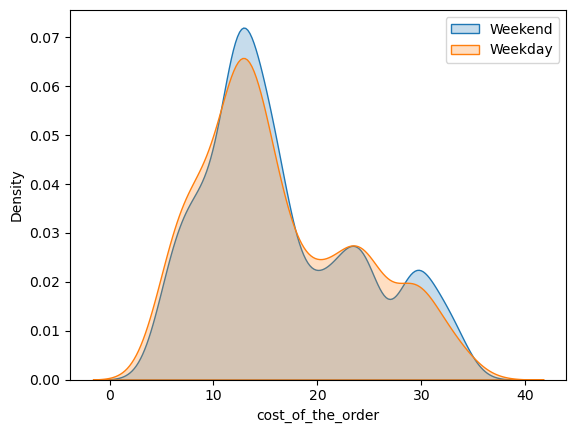

In [86]:
# Distribution plot of Cost of Order per Day of the Week
day = ['Weekend', 'Weekday']

for i in day:
    subset = df[df['day_of_the_week'] == i]
    sns.distplot(subset['cost_of_the_order'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)
plt.legend(labels=day)

#### Food Preparation Time

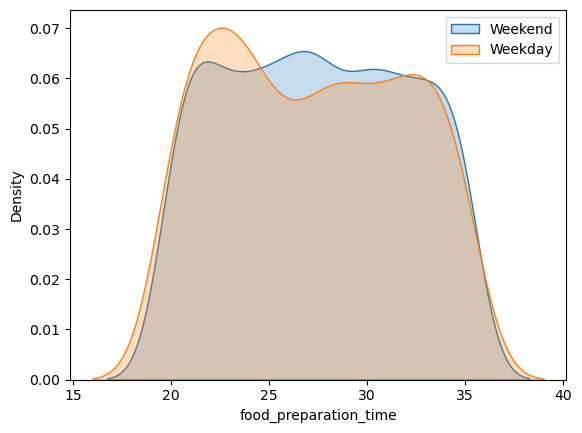

In [87]:
day = ['Weekend', 'Weekday']

for i in day:
    subset = df[df['day_of_the_week'] == i]
    sns.distplot(subset['food_preparation_time'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)
plt.legend(labels=day)

The food preparation time appears to be shorter during the week than during the weekend.

#### Delivery time per the day of the week

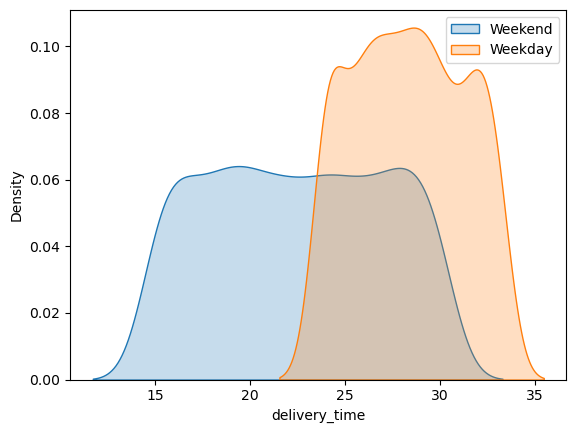

In [88]:
day = ['Weekend', 'Weekday']

# # iterate through time
for i in day:
    subset = df[df['day_of_the_week'] == i]
    sns.distplot(subset['delivery_time'], hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)
    
plt.legend(labels=day)

Delivery time seems to take longer during the week.

#### Cost of the Order per Cuisine Type

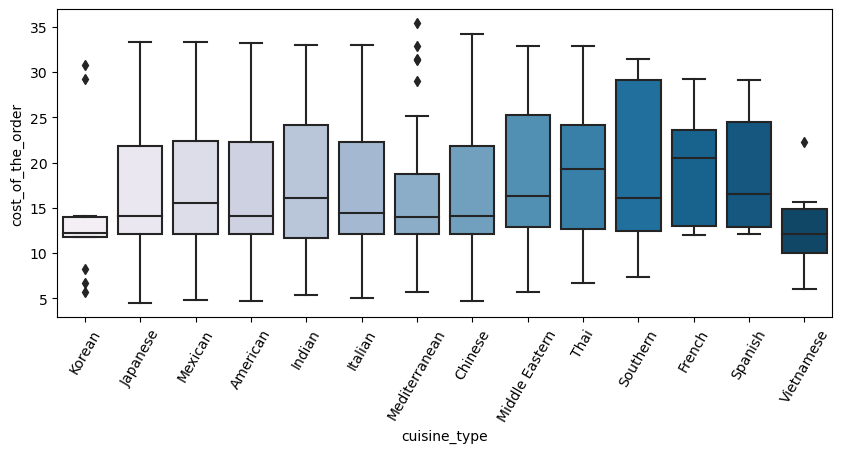

In [37]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(10,4))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Southern and Spanish food seem cost the highest and Korean and Vietnamese the lowest.

#### Food Preparation Time per Cuisine Type

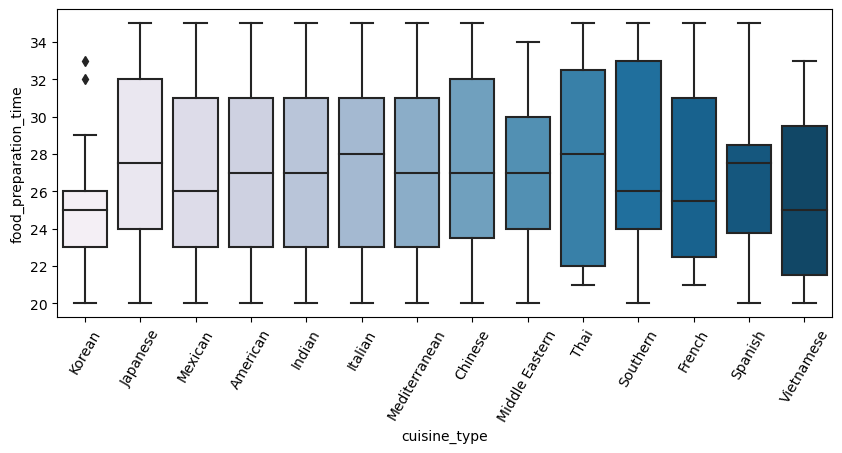

In [38]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,4))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

Southern food seems to take the longest time and Korean food seems to take the shortest to prepare.

#### Delivery Time as per the Day of the Week

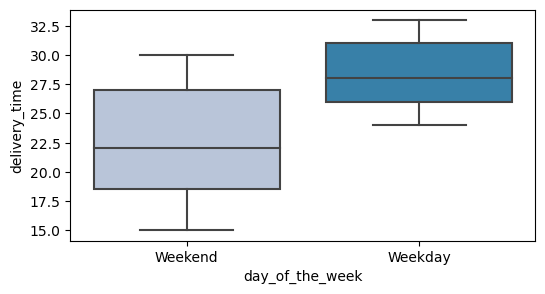

In [41]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(6,3))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

Delivery time takes shorter during the week.

#### Cost of Order per Restaurant

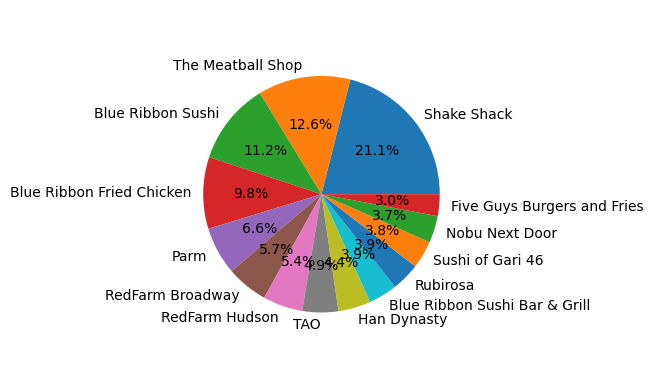

In [42]:
restaurant_cost_order = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14) 
labels = list(restaurant_cost_order.index)
plt.pie(restaurant_cost_order, autopct = '%.1f%%', radius = 0.8, 
        labels = labels)
plt.show() 

Shake Shack is the most expensive restaurant and Five Guys Burgers and Fries the least expensive.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [93]:
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int') 

# Get the names of the restaurants with mean rating greater than 4
mean_rating = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
mean_names = mean_rating[mean_rating['rating'] > 4]['restaurant_name'] 

# Get the names of the restaurants with rating count greater than 50
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] 

# Get the intersection of both
promotion = pd.Series(list(set(mean_names) & set(rest_names)))
promotion

0                  Shake Shack
1    Blue Ribbon Fried Chicken
2            The Meatball Shop
3            Blue Ribbon Sushi
dtype: object

#### Observations: The restaurants "The Meatball Shop", "Shake Shack", "Blue Ribbon Fried Chicken", and "Blue Ribbon Sushi" are the restaurants fulfilling the criteria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [94]:
def charge(order_cost):
    if order_cost > 20:
        revenue = order_cost*0.25
    elif order_cost <= 20 and order_cost > 5:
        revenue = order_cost*0.15
    else:
        revenue = 0
        
    return revenue 

df['revenue'] = df['cost_of_the_order'].apply(charge)
df['revenue'].sum()

6166.303

#### Observations: The total revenue generated by charging restaurants based on the cost of order across all orders is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [95]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60 = df[df['total_time']>60] 
print('The number of total orders that have more than 60 minutes is:', df_greater_than_60.shape[0])
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 60 minutes:", percentage, '%')

The number of total orders that have more than 60 minutes is: 200
Percentage of orders above 60 minutes: 10.537407797681771 %


#### Observations: The time of delivery from the time the order is placed is the sum of food preparation time and delivery time. The percentage of orders taking more than 60 minutes is 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [96]:
print(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())

28.340036563071298
22.4700222057735


#### Observations: The mean delivery time on weekdays is around 28 minutes and on weekends is around 22 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions:
*  Delivery time is longer during the week.
*  Mexican and Japanese restaurants have the most orders.
*  Orders are place more frequently during the week.
*  Delivery time is longer during the week.
*  The median cost of the orders is $14.14.
 

### Recommendations:

*  Southern and Thai cuisines have the longest preparation time. Hence it is recommended to increase the number of delivery vehicles around those restaurants.
*  Since the top restaurants return more revenues, increase the number of delivery vehicles in the area.
*  Mexican and Japanese restaurants have the most orders, hence make more cars available.
*  Maker more cars available during the week.

---